In [1]:
#Load dataset + create journey
import pandas as pd

df = pd.read_csv("Dataset.csv", engine="python", on_bad_lines="skip")

df["Arrival_time"] = pd.to_datetime(df["Arrival_time"], errors="coerce")
df["Departure_Time"] = pd.to_datetime(df["Departure_Time"], errors="coerce")

journey = df.groupby("Train_No").agg(
    start=("Departure_Time","first"),
    end=("Arrival_time","last"),
    total_distance=("Distance","max"),
    stops=("Station_Name","count")
)

journey["duration"] = (journey["end"]-journey["start"]).dt.total_seconds()/3600
journey = journey.dropna()

print("Journey ready ✅")

Journey ready ✅


C:\Users\Ashu21\AppData\Local\Temp\ipykernel_13276\3408201283.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_time"] = pd.to_datetime(df["Arrival_time"], errors="coerce")
C:\Users\Ashu21\AppData\Local\Temp\ipykernel_13276\3408201283.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Departure_Time"] = pd.to_datetime(df["Departure_Time"], errors="coerce")


In [2]:
#Train basic model (distance only)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_basic = journey[["total_distance"]]
y = journey["duration"]

X_train,X_test,y_train,y_test = train_test_split(
    X_basic,y,test_size=0.2,random_state=42
)

basic_model = LinearRegression()
basic_model.fit(X_train,y_train)

pred_basic = basic_model.predict(X_test)

print("Basic MAE:", mean_absolute_error(y_test,pred_basic))

Basic MAE: 6.7730512625478045


In [3]:
#Train improved model (distance + stops)
X_improved = journey[["total_distance","stops"]]

X_train2,X_test2,y_train2,y_test2 = train_test_split(
    X_improved,y,test_size=0.2,random_state=42
)

improved_model = LinearRegression()
improved_model.fit(X_train2,y_train2)

pred_improved = improved_model.predict(X_test2)

print("Improved MAE:", mean_absolute_error(y_test2,pred_improved))

Improved MAE: 6.772822160579352


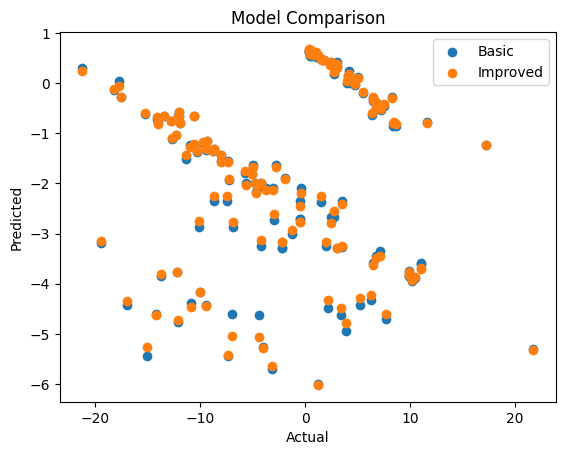

In [4]:
#Compare visually
import matplotlib.pyplot as plt

plt.scatter(y_test,pred_basic,label="Basic")
plt.scatter(y_test2,pred_improved,label="Improved")

plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Model Comparison")
plt.show()

In [5]:
#Save improved model 
import joblib

joblib.dump(improved_model,"train_duration_model.pkl")
print("Improved model saved ✅")

Improved model saved ✅
